In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("D:\SEM - 6\DSBDA\Datasets\TitanicDataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.describe(include=int)

,PassengerId,Survived,Pclass,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.447368,0.392344
std,120.810458,0.481622,0.841838,0.896760,0.981429
min,892.000000,0.000000,1.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,0.000000
50%,1100.500000,0.000000,3.000000,0.000000,0.000000
75%,1204.750000,1.000000,3.000000,1.000000,0.000000
max,1309.000000,1.000000,3.000000,8.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
new_age=df['Age'].mean()
df['Age'].replace(np.nan,new_age,inplace=True)


In [8]:
new_fare=df['Fare'].median()
df['Fare'].replace(np.nan,new_fare,inplace=True)

In [9]:
new_cabin=df['Cabin'].value_counts().idxmax()
df['Cabin'].replace(np.nan,"B57 B59 B63 B66",inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: ylabel='PassengerId'>

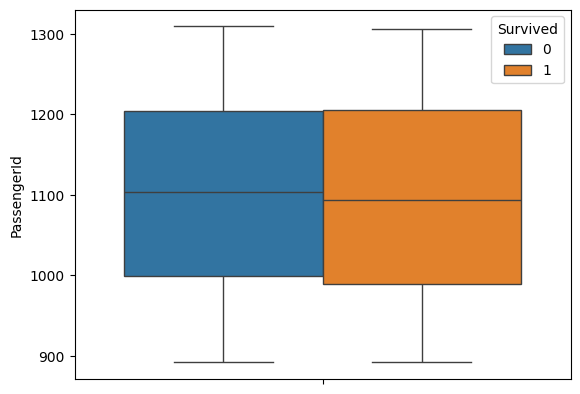

In [11]:
import seaborn as sns
sns.boxplot(y=df['PassengerId'], hue=df['Survived'])

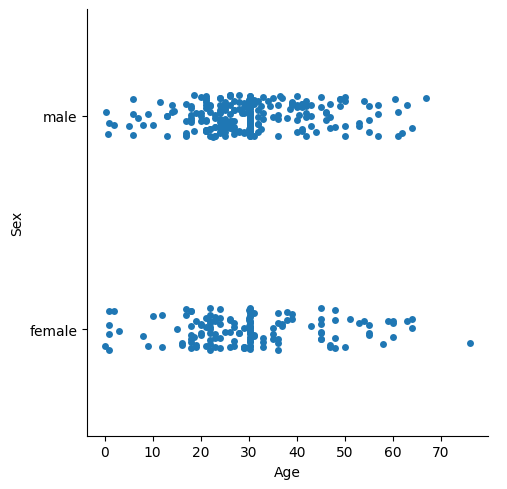

In [12]:
sns.catplot(x=df['Age'],y=df['Sex'], kind='strip')

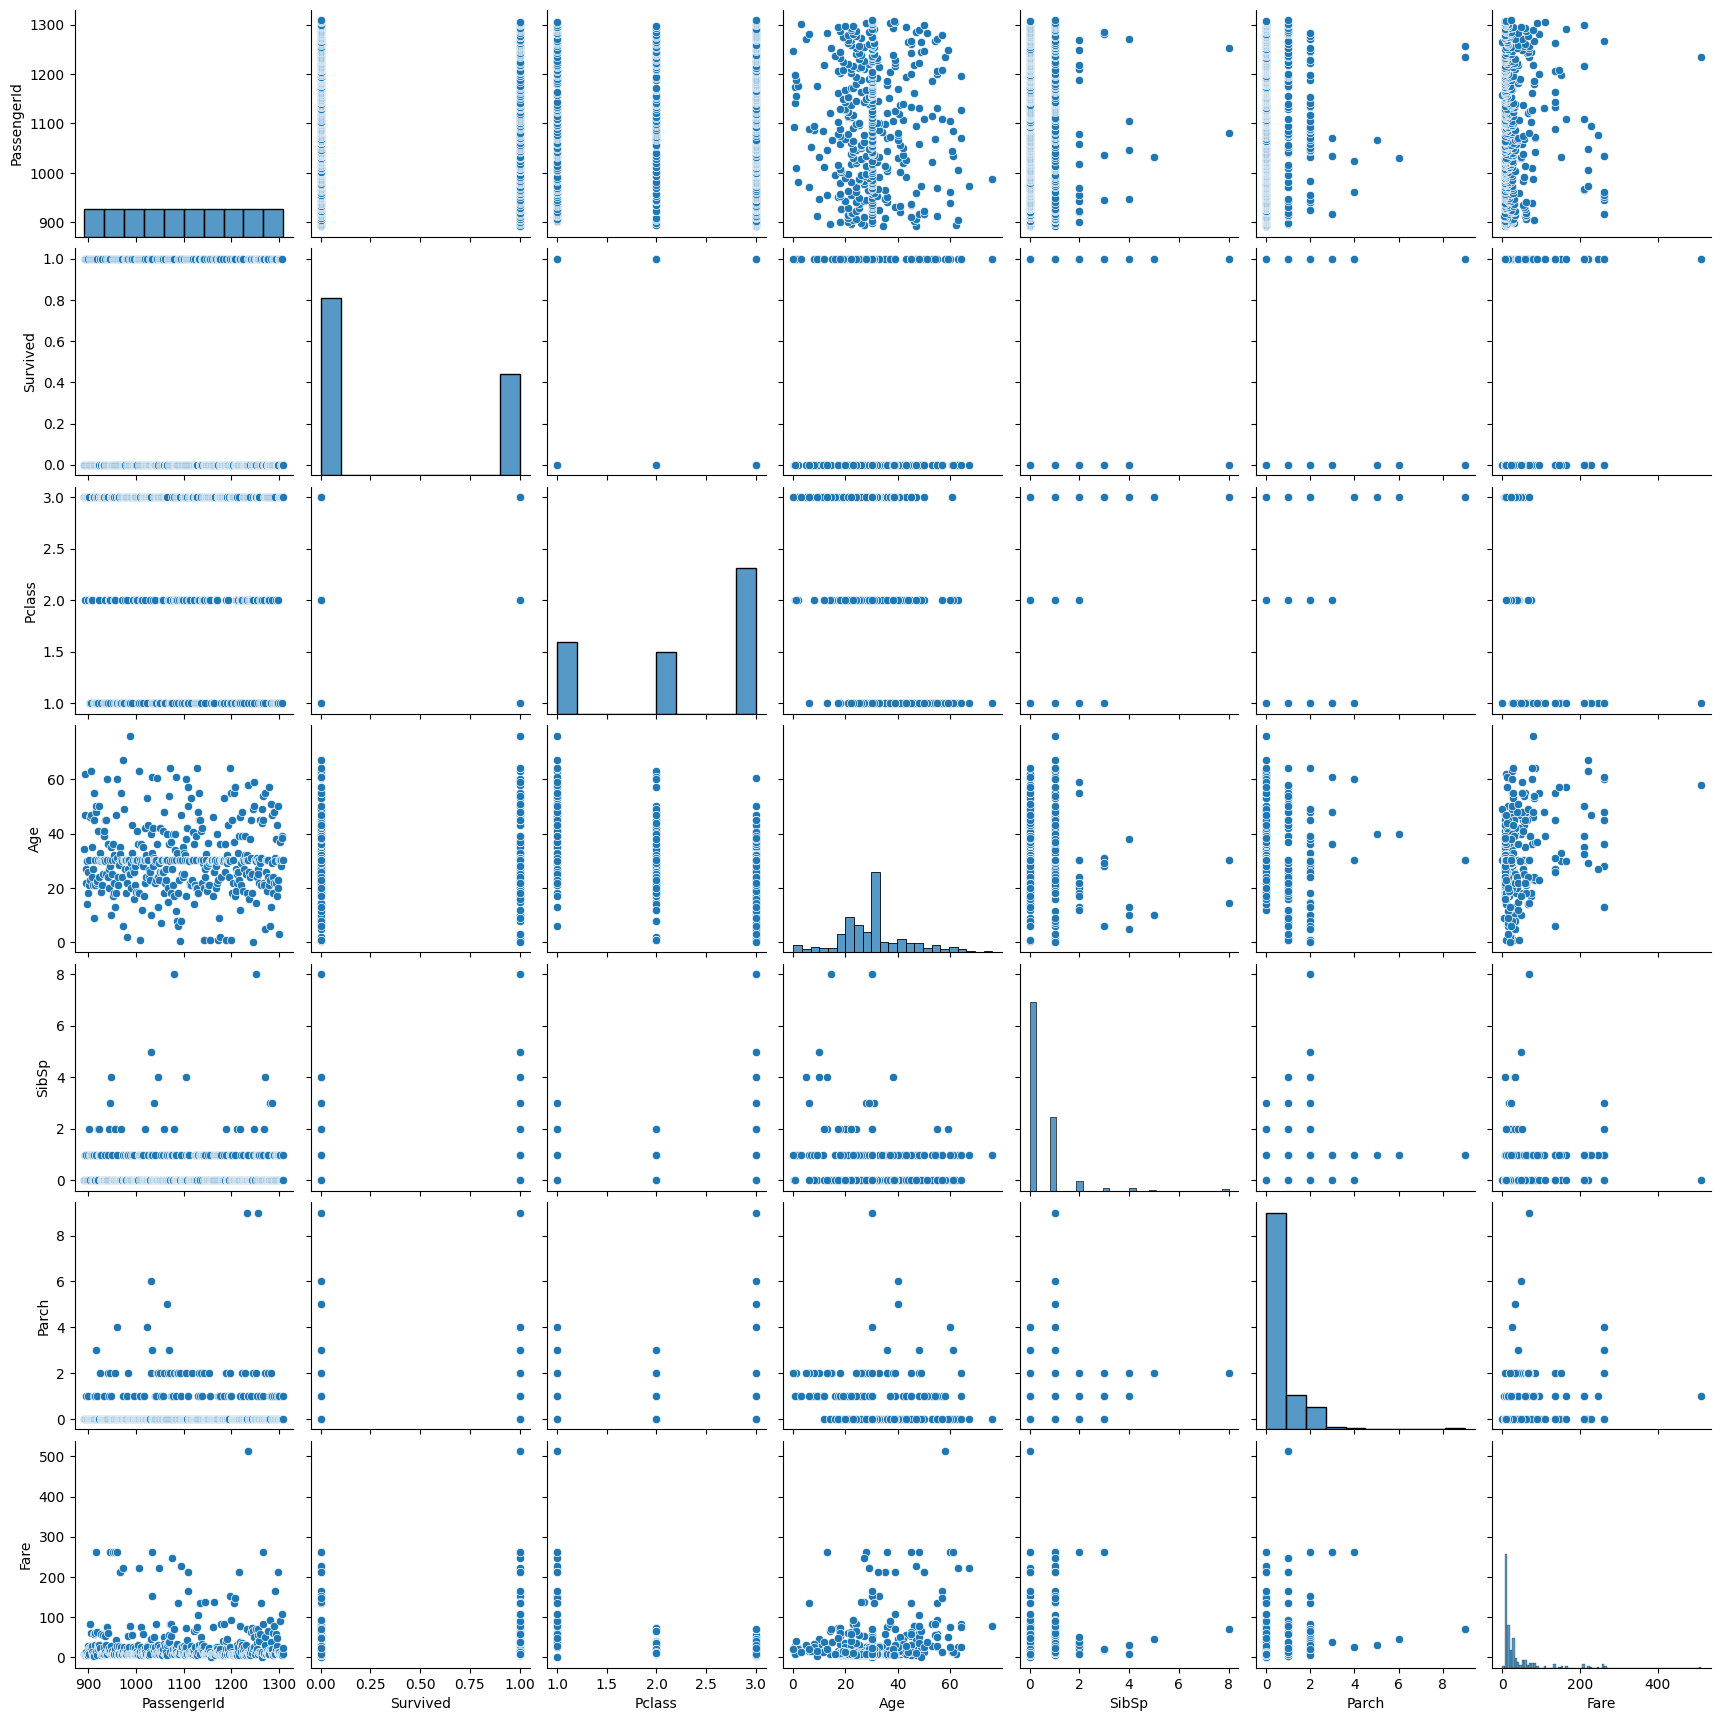

In [13]:
sns.pairplot(df)

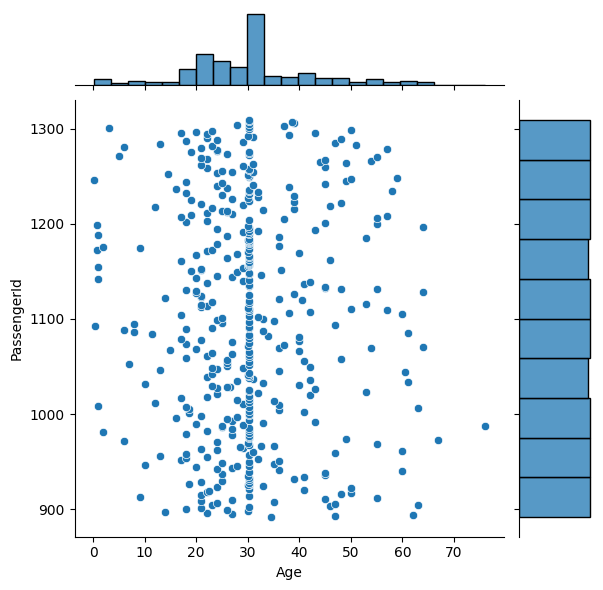

In [14]:
sns.jointplot(x=df['Age'], y=df['PassengerId'])

<Axes: xlabel='Pclass', ylabel='count'>

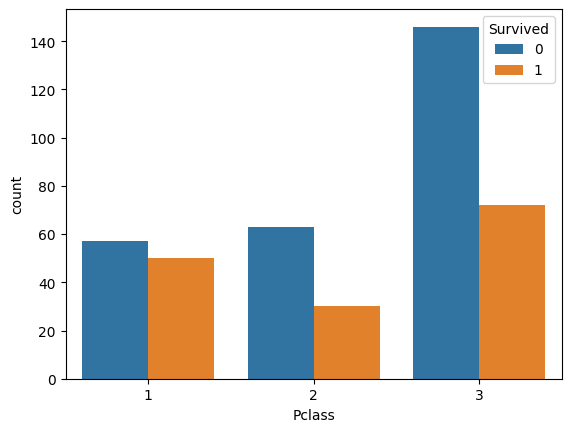

In [15]:
sns.countplot(df,x=df['Pclass'],hue=df['Survived'])

<Axes: xlabel='Fare', ylabel='Count'>

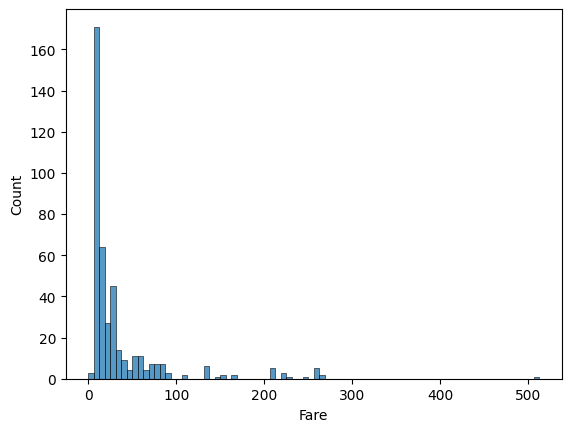

In [16]:
sns.histplot(x=df['Fare'])

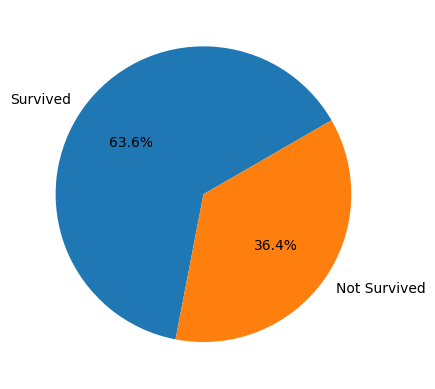

In [17]:
plt.pie(df['Survived'].value_counts(), labels=['Survived','Not Survived'],autopct='%1.1f%%', startangle=30)
plt.show()

([<matplotlib.patches.Wedge at 0x2927d300590>,
 [Text(-1.0974844701366373, -0.07434943045447255, '1st Class'),
  Text(0.8879708990840047, -0.6492362300272102, '2nd Class'),
  Text(0.7077698277381473, 0.8420581161318459, '3rd Class')],
 [Text(-0.5986278928018022, -0.04055423479334866, '52.2%'),
  Text(0.4843477631367298, -0.3541288527421146, '25.6%'),
  Text(0.38605626967535306, 0.4593044269810068, '22.2%')])

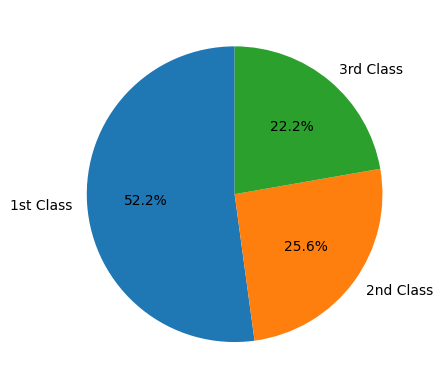

In [18]:
plt.pie(df['Pclass'].value_counts(), labels=['1st Class', '2nd Class', '3rd Class'], autopct='%1.1f%%', startangle=90)


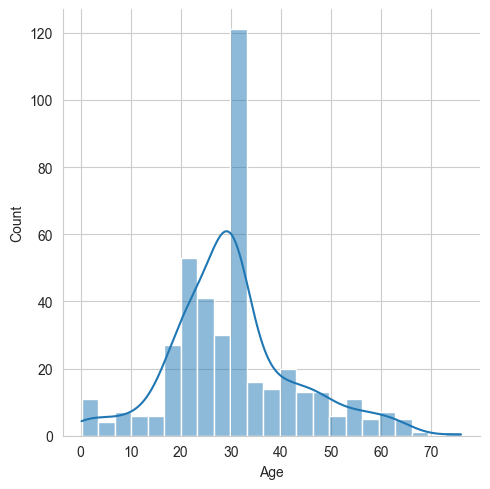

In [19]:
sns.set_style('whitegrid')
sns.displot(df['Age'],kde=True)

##### Plot a box plot for distribution of age with respect to each gender along with the information about whether they survived
##### or not. (Column names : 'sex' and 'age')


<Axes: xlabel='Age', ylabel='Sex'>

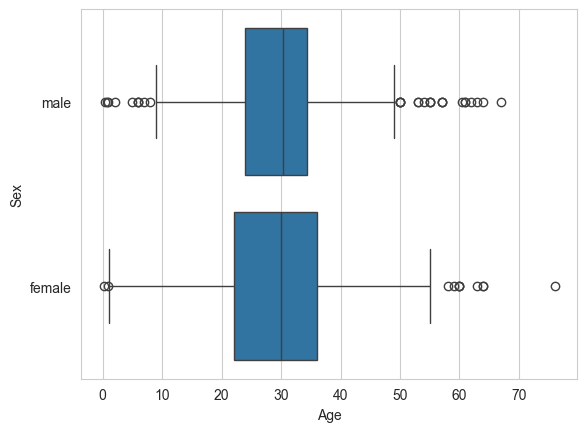

In [20]:
sns.boxplot(x=df['Age'], y=df['Sex'])

<Axes: xlabel='Age', ylabel='Count'>

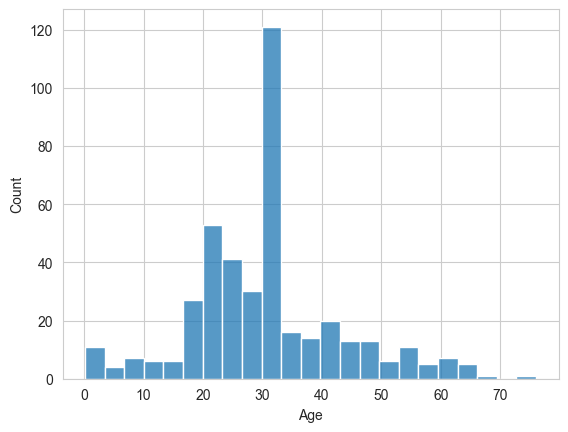

In [23]:
sns.histplot(x=df['Age'])


<Axes: xlabel='Embarked', ylabel='Count'>

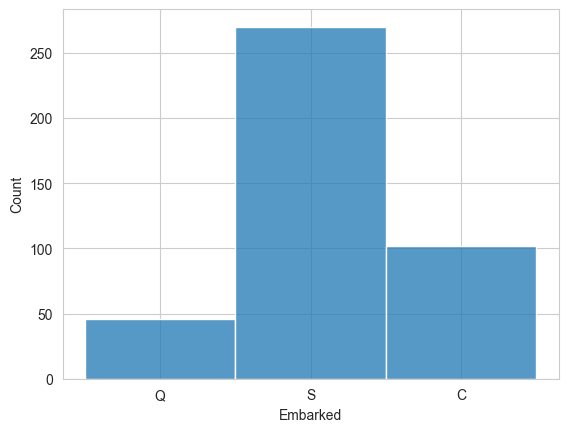

In [24]:
sns.histplot(x=df['Embarked'])

<Axes: xlabel='Sex', ylabel='Count'>

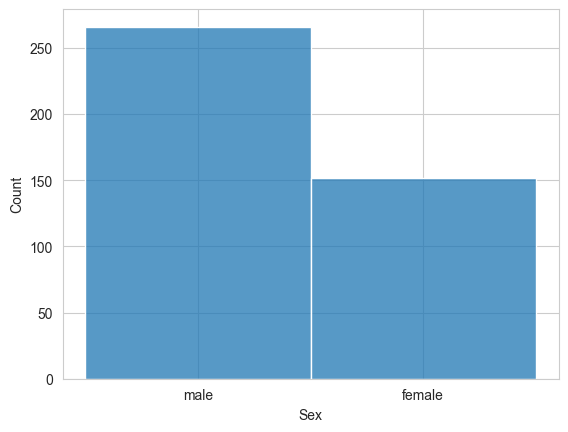

In [25]:
sns.histplot(x=df['Sex'])

<Axes: xlabel='Pclass', ylabel='Count'>

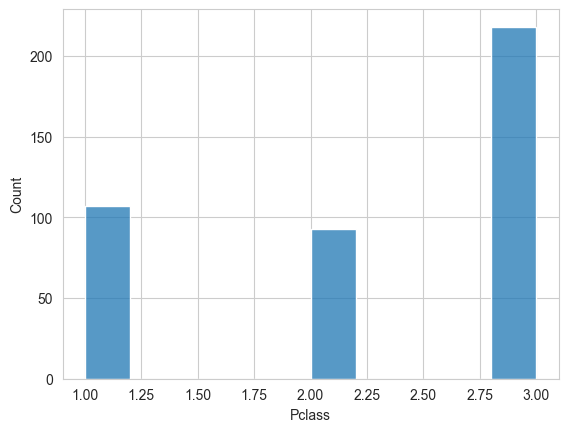

In [28]:
sns.histplot(x=df['Pclass'])